In [3]:
from cells import layer_v_with_ais_test 
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload

reload(layer_v_with_ais_test )
cell = layer_v_with_ais_test.SPI6()

# Calculate Rheobase

Calculating the Rheobase through iterating until first action potential is generated

In [3]:
from helpers.rheobase import *

over, under = calculateRheobase(layer_v_with_ais_test.SPI6)

Intial guess -0.2
Running in range  0.6000000000000001 from  -0.2 to  0.4000000000000001
Detected first AP at 0.10000000000000003  [mv]
Intial guess 0.10000000000000003
Running in range  0.03000000000000001 from  0.07000000000000002 to  0.13000000000000003
Detected first AP at 0.09700000000000003  [mv]
Intial guess 0.09700000000000003
Running in range  0.002910000000000001 from  0.09409000000000003 to  0.09991000000000003
Detected first AP at 0.09612700000000003  [mv]


In [4]:
from helpers.stimulation import *

underplot= stimulate(layer_v_with_ais_test.SPI6, under)
overplot= stimulate(layer_v_with_ais_test.SPI6, over)

NameError: name 'under' is not defined

## Plotting of the acquired Traces

With the help of matplotlib

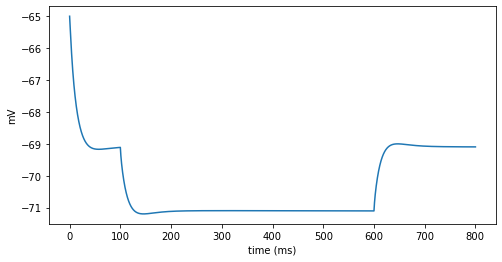

In [6]:
from helpers.stimulation import *
from helpers import generic

nana = stimulate(layer_v_with_ais_test.SPI6, {"dur":500, "delay":100, "amp": -0.025})
generic.plotTrace(nana)

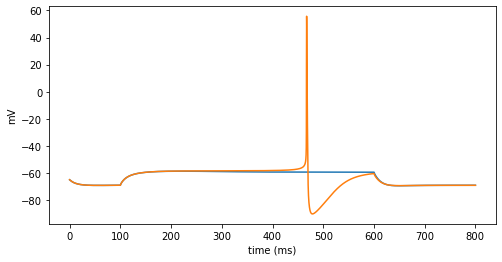

In [12]:
# One Trace
from helpers import generic
reload(generic)
generic.plotTraces([underplot,overplot])

## Plotting of the initial AP

Plots the first AP that is being genarated by the Plot

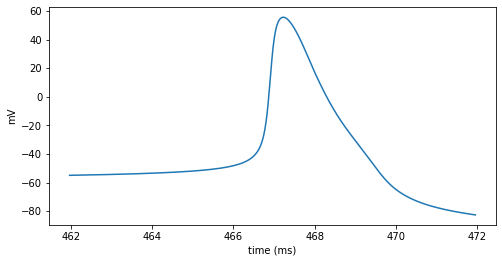

In [14]:
from helpers.generic import isolateTime, plotTrace

firstpeaktime = overplot["aps"][0]
newtrace = isolateTime(overplot, firstpeaktime)
plotTrace(newtrace)
